In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("BankCustomers.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df=df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

In [4]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
X=df.iloc[:,:10]
Y=df.iloc[:,10]

In [7]:
X["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
geography=pd.get_dummies(X["Geography"], drop_first=True)
gender=pd.get_dummies(X["Gender"], drop_first=True)

In [9]:
X=pd.concat([X, geography, gender], axis=1)
X=X.drop(["Geography", "Gender"], axis=1)

In [10]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [13]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [14]:
import keras

In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [16]:
model=Sequential()

In [17]:
model.add(Dense(activation='relu', input_dim=11, units=8))
model.add(Dense(activation='relu', units=4))
model.add(Dense(activation='relu', units=2))
model.add(Dense(activation='sigmoid', units=1))

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
model_history=model.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.1)

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 0.5408 - accuracy: 0.7943 - val_loss: 0.5268 - val_accuracy: 0.8000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5122 - accuracy: 0.7943 - val_loss: 0.5039 - val_accuracy: 0.8000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4964 - accuracy: 0.7943 - val_loss: 0.4892 - val_accuracy: 0.8000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4860 - accuracy: 0.7943 - val_loss: 0.4788 - val_accuracy: 0.8000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4781 - accuracy: 0.7943 - val_loss: 0.4709 - val_accuracy: 0.8000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.7943 - val_loss: 0.4647 - val_accuracy: 0.8000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4664 - accuracy: 0.7943 - val_loss: 0.4599 - val_accuracy: 0.8000
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3540 - accuracy: 0.8595 - val_loss: 0.3644 - val_accuracy: 0.8511
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3531 - accuracy: 0.8607 - val_loss: 0.3637 - val_accuracy: 0.8500
Epoch 61/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3521 - accuracy: 0.8604 - val_loss: 0.3624 - val_accuracy: 0.8489
Epoch 62/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3515 - accuracy: 0.8616 - val_loss: 0.3617 - val_accuracy: 0.8478
Epoch 63/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3507 - accuracy: 0.8607 - val_loss: 0.3615 - val_accuracy: 0.8478
Epoch 64/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3499 - accuracy: 0.8615 - val_loss: 0.3611 - val_accuracy: 0.8511
Epoch 65/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3495 - accuracy: 0.8615 - val_loss: 0.3606 - val_accuracy: 0.8500
Epoch 

In [20]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

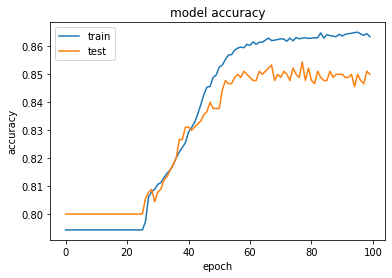

In [21]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

In [23]:
y_train_pred=(y_train_pred>0.5).astype(int)
y_test_pred=(y_test_pred > 0.5).astype(int)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm  = confusion_matrix(y_test, y_test_pred)
cm

array([[779,  30],
       [105,  86]], dtype=int64)

In [25]:
train_score=accuracy_score(y_train, y_train_pred)
test_score=accuracy_score(y_test, y_test_pred)
print("Train set accuracy is:", train_score*100)
print("Test set accuracy is:", test_score*100)

Train set accuracy is: 86.31111111111112
Test set accuracy is: 86.5


In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
depth=[]
train_score=[]
test_score=[]
for i in range(1, 15):
    depth.append(i)
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(x_train, y_train)
    train_score.append(model.score(x_train, y_train)*100)
    test_score.append(model.score(x_test, y_test)*100)

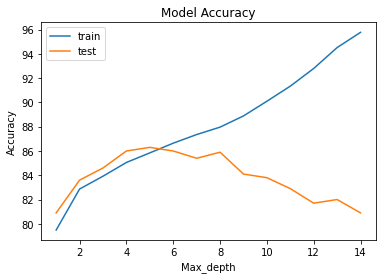

In [28]:
plt.plot(depth,train_score)
plt.plot(depth,test_score)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Max_depth')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(x_train, y_train)
print("Max_depth = 5")
print("Train score:",model.score(x_train, y_train)*100)
print("Train score:",model.score(x_test, y_test)*100)

Max_depth = 5
Train score: 85.84444444444445
Train score: 86.3
